# Analysis of $T_{pk}$'s of traits vs latitude and lab growth / rearing temperatures   

In [17]:
rm(list=ls())
graphics.off()

require('tidyverse')
require('ggpubr')
require('patchwork')
require('cowplot') # to arrange multiple plots

## Relationship of $T_{pk}$ of $\alpha$ vs latitude

In [18]:
##### Relationship of $T_{pk}$ of $\alpha$ vs latitude #####

alphaLat <- as_tibble(read_csv('../data/TraitData.csv')) %>%
                rename(species = interactor1) %>%
                # select(species, standardisedtraitname, latitude) %>%
                filter(standardisedtraitname == '1/alpha' & latitude != 'NA') %>%
                distinct(species, latitude)

alphaMass <- as_tibble(read_csv('../data/a_pksT_pksMass.csv'))  %>% 
                select(-curve_ID) 
# %>% 
                # select (species, a_pk, T_pk, mass)

head(alphaLat)

head(alphaMass)

alphaLat_data <- alphaMass %>% inner_join(alphaLat) %>%
                    mutate(a_pkmassCor = a_pk/mass^-0.27)

head(alphaLat_data)

Rows: 1538 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): a_pk, a_pkLwr, a_pkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,latitude
<chr>,<dbl>
Paracoccus marginatus,25.468722
Bemisia tabaci,-6.800000
Antestiopsis thunbergii,-3.334883
Monochamus leuconotus,-3.334883
Anopheles gambiae,6.455027
Tetranychus evansi,-1.440000


a_pk,a_pkLwr,a_pkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.13092688,0.11484955,0.17789019,Aedes albopictus,31.160,29.87374,33.56059,2.202857
0.08282502,0.07943271,0.09426917,Bemisia tabaci,29.751,29.37129,30.66478,0.293125
0.11794938,0.11686865,0.11889559,Tetraneura nigriabdominalis,30.648,30.51723,30.78992,0.867300
0.15281755,0.14413105,0.16531167,Stethorus punctillum,32.875,32.78152,33.01626,0.480000
0.35107259,0.32206148,0.38494603,Tetranychus mcdanieli,35.182,34.89144,35.70428,0.024300
0.16981269,0.14984768,0.19132875,Tetranychus urticae,31.467,29.80140,33.61485,0.024300


Joining with `by = join_by(species)`


a_pk,a_pkLwr,a_pkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass,latitude,a_pkmassCor
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.13092688,0.11484955,0.17789019,Aedes albopictus,31.160,29.87374,33.56059,2.202857,46.07488,0.16204481
0.08282502,0.07943271,0.09426917,Bemisia tabaci,29.751,29.37129,30.66478,0.293125,-6.80000,0.05946560
0.11794938,0.11686865,0.11889559,Tetraneura nigriabdominalis,30.648,30.51723,30.78992,0.867300,24.15000,0.11350144
0.15281755,0.14413105,0.16531167,Stethorus punctillum,32.875,32.78152,33.01626,0.480000,46.79110,0.12534539
0.35107259,0.32206148,0.38494603,Tetranychus mcdanieli,35.182,34.89144,35.70428,0.024300,46.79110,0.12867987
0.16981269,0.14984768,0.19132875,Tetranychus urticae,31.467,29.80140,33.61485,0.024300,35.70969,0.06224204


In [19]:
alphaLat_lm <- lm(T_pk ~ abs(latitude), data = alphaLat_data)
summary(alphaLat_lm)
confint(alphaLat_lm, level=0.95)


Call:
lm(formula = T_pk ~ abs(latitude), data = alphaLat_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9862  -2.1855  -0.1483   1.8429   6.3224 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   32.16461    0.97919  32.848   <2e-16 ***
abs(latitude) -0.05666    0.02912  -1.946   0.0577 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.202 on 47 degrees of freedom
Multiple R-squared:  0.07456,	Adjusted R-squared:  0.05487 
F-statistic: 3.786 on 1 and 47 DF,  p-value: 0.05766


,2.5 %,97.5 %
(Intercept),30.1947251,34.134487885
abs(latitude),-0.1152332,0.001917601


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


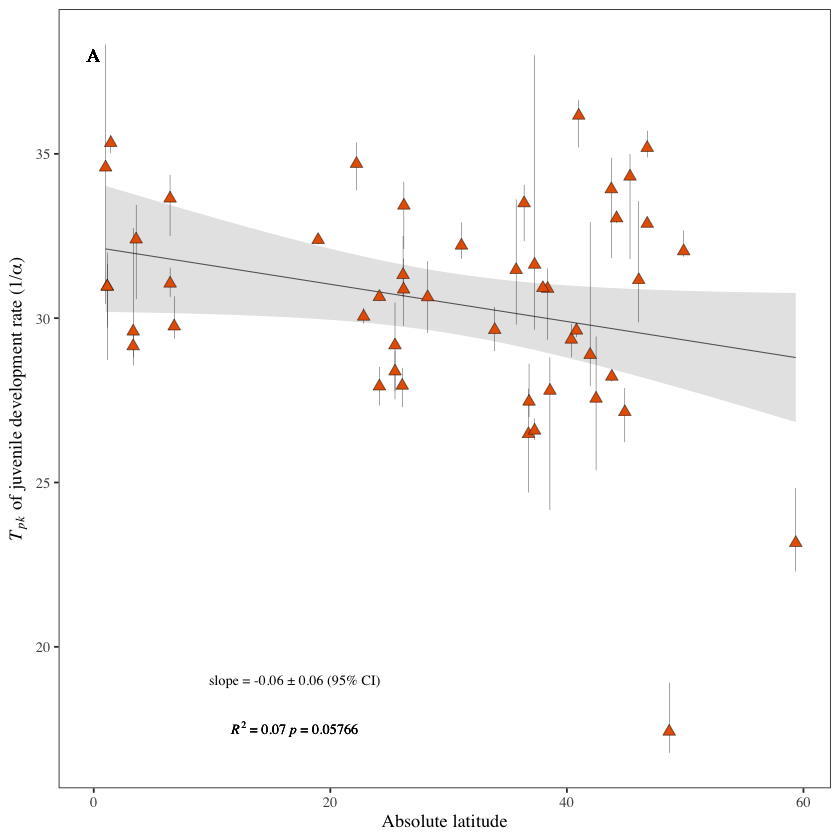

In [20]:
a_T_pklat_plot <-
  alphaLat_data %>%
  ggplot(aes(x= abs(latitude), y = T_pk))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(paste(italic(T[pk]), " of juvenile development rate (","1/", italic(alpha),")")))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_linerange(aes(ymin =T_pkLwr , ymax = T_pkUpr),size= 0.1,col="#000000")+
  theme_bw()+
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape=24, fill ='#e66101')+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 0, y = 38,label = "A"), 
            parse = TRUE, size = 4, colour = "black", family='Times')+
annotate("text", x = 17, y = 17.5, label = italic("R")^2~"= 0.07"~italic("p")~"= 0.05766", size=3, family='Times')+
annotate("text", x = 17, y = 19, label = "slope = -0.06 ± 0.06 (95% CI)", size=3, family='Times')

a_T_pklat_plot

## Relationship of $T_{pk}$ of $b_{max}$ vs latitude

In [21]:
##### ## Relationship of $T_{pk}$ of $b_{max}$ vs latitude #####

bmaxLat <- as_tibble(read_csv('../data/TraitData.csv')) %>%
                rename(species = interactor1) %>%
                filter(standardisedtraitname == 'bmax' & latitude != 'NA') %>%
                distinct(species, latitude)

bmaxMass <- as_tibble(read_csv('../data/bmaxT_pksMass.csv'))  %>% 
                select(-curve_ID) 
                

head(bmaxLat)

head(bmaxMass)

bmaxLat_data <- bmaxMass %>% inner_join(bmaxLat) %>%
                    mutate(bmaxmassCor = bmax/mass^0.12)

head(bmaxLat_data)

Rows: 1538 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 44 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): bmax, bmaxLwr, bmaxUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,latitude
<chr>,<dbl>
Acyrthosiphon pisum,36.500000
Paracoccus marginatus,25.468722
Bemisia tabaci,-6.800000
Antestiopsis thunbergii,-3.334883
Monochamus leuconotus,-3.334883
Tetranychus evansi,-1.440000


bmax,bmaxLwr,bmaxUpr,species,T_pk,T_pkLwr,T_pkUpr,mass
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
13.001684,9.355172,17.998032,Bemisia tabaci,34.721,34.35364,35.78279,0.293125
3.079183,2.494742,3.597847,Tetraneura nigriabdominalis,28.832,27.90100,29.06633,0.867300
7.114108,6.305991,8.840443,Stethorus punctillum,30.131,28.67675,30.93873,0.480000
10.164576,8.667029,11.525538,Tetranychus mcdanieli,29.271,27.14039,30.68457,0.024300
7.033624,6.405528,7.755994,Clavigralla tomentosicollis,29.450,28.62589,30.95981,50.495000
8.050324,6.719018,9.847111,Planococcus citri,23.755,22.50855,27.82002,1.890000


Joining with `by = join_by(species)`


bmax,bmaxLwr,bmaxUpr,species,T_pk,T_pkLwr,T_pkUpr,mass,latitude,bmaxmassCor
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.001684,9.355172,17.998032,Bemisia tabaci,34.721,34.35364,35.78279,0.293125,-6.8000,15.064449
3.079183,2.494742,3.597847,Tetraneura nigriabdominalis,28.832,27.90100,29.06633,0.867300,24.1500,3.132241
7.114108,6.305991,8.840443,Stethorus punctillum,30.131,28.67675,30.93873,0.480000,46.7911,7.769114
10.164576,8.667029,11.525538,Tetranychus mcdanieli,29.271,27.14039,30.68457,0.024300,46.7911,15.878758
7.033624,6.405528,7.755994,Clavigralla tomentosicollis,29.450,28.62589,30.95981,50.495000,6.4503,4.393285
8.050324,6.719018,9.847111,Planococcus citri,23.755,22.50855,27.82002,1.890000,36.8000,7.458267


In [22]:
bmax_T_pklatmodel <- lm(T_pk ~ abs(latitude), data = bmaxLat_data)
summary(bmax_T_pklatmodel)
confint(bmax_T_pklatmodel, level=0.95)
anova(bmax_T_pklatmodel)


Call:
lm(formula = T_pk ~ abs(latitude), data = bmaxLat_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1741 -1.5610 -0.2808  2.3593  6.0910 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   30.36117    1.15534  26.279   <2e-16 ***
abs(latitude) -0.07919    0.03795  -2.087   0.0431 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.698 on 41 degrees of freedom
Multiple R-squared:  0.09603,	Adjusted R-squared:  0.07398 
F-statistic: 4.355 on 1 and 41 DF,  p-value: 0.04315


,2.5 %,97.5 %
(Intercept),28.0279229,32.694421788
abs(latitude),-0.1558244,-0.002558554


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
abs(latitude),1,59.56876,59.56876,4.355434,0.04314959
Residuals,41,560.75215,13.67688,NA,NA


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


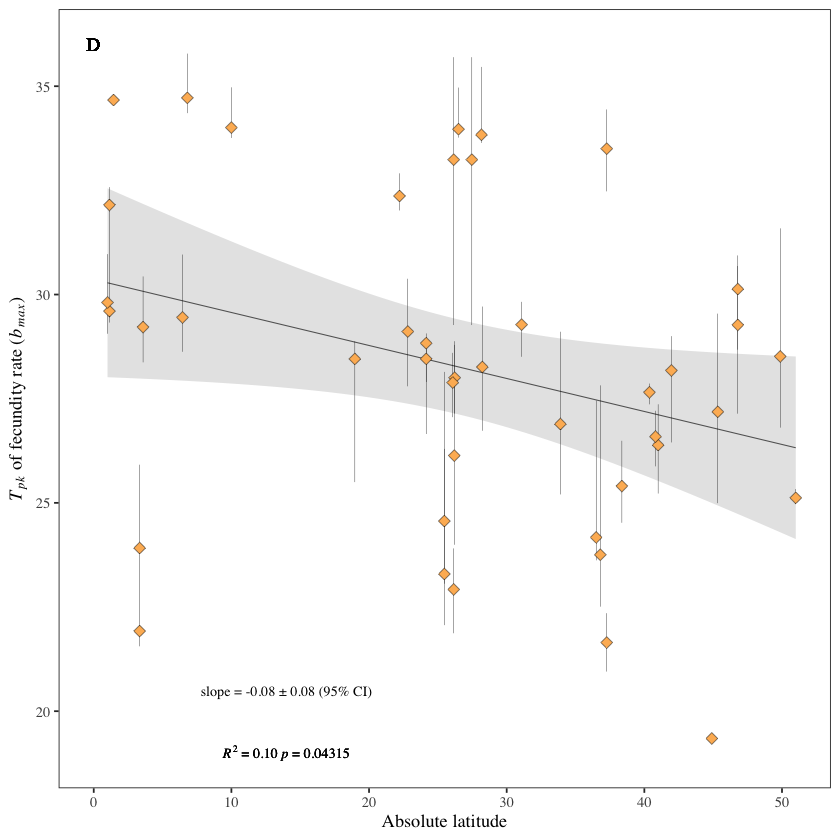

In [23]:
bmax_T_pklat_plot <-
  bmaxLat_data %>%
  ggplot(aes(x= abs(latitude), y = T_pk))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  geom_linerange(aes(ymin =T_pkLwr , ymax = T_pkUpr),size= 0.1,col="#000000")+
  scale_y_continuous(expression(paste(italic(T[pk]), " of fecundity rate (", italic(b[max]),")")))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_point(size = 2.5,stroke=0.2, col = '#000000', fill="#fdb863", shape=23)+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(legend.position = 'none',legend.text = element_text(size = 10),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 0, y = 36, label = "D"), 
            parse = TRUE, size = 4, colour = "black",family='Times')+
annotate("text", x = 14, y = 19, label = italic("R")^2~"= 0.10"~italic("p")~"= 0.04315", size=3, family='Times')+
annotate("text", x = 14, y = 20.5, label = "slope = -0.08 ± 0.08 (95% CI)", size=3, family='Times')

bmax_T_pklat_plot

## Relationship of $T_{pk}$ of $z_J$ vs latitude


In [24]:
##### Relationship of $T_{pk}$ of $z_J$ vs latitude #####

zJLat <- as_tibble(read_csv('../data/TraitData.csv')) %>%
                rename(species = interactor1) %>%
                filter(standardisedtraitname == 'zj' & latitude != 'NA') %>%
                distinct(species, latitude)

zJMass <- as_tibble(read_csv('../data/zj_pksT_pksMass.csv'))  %>% 
                select(-curve_ID)

head(zJLat)

head(zJMass)

zJLat_data <- zJMass %>% inner_join(zJLat) %>%
                    mutate(z_JmassCor = zjpk/mass^-0.22)

head(zJLat_data)

Rows: 1538 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 34 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zjpk, zjpkLwr, zjpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,latitude
<chr>,<dbl>
Acyrthosiphon pisum,36.500000
Paracoccus marginatus,25.468722
Bemisia tabaci,-6.800000
Anopheles gambiae,6.455027
Tetranychus urticae,35.709686
Halyomorpha halys,45.336389


zjpk,zjpkLwr,zjpkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.029456767,0.03107826,0.027807984,Thrips hawaiiensis,21.612,21.14294,22.15052,0.040000
0.012854225,0.01486171,0.008982088,Bemisia tabaci,18.811,16.81676,21.03174,0.293125
0.009275934,0.01199465,0.008001464,Tetraneura nigriabdominalis,33.246,25.64660,33.25892,0.867300
0.016435073,0.01865326,0.014527593,Stethorus punctillum,16.481,15.12263,18.54681,0.480000
0.102693969,0.12890800,0.087989777,Amblyseius womersleyi,22.987,17.64451,24.91169,0.005060
0.014343249,0.01574338,0.012177272,Tetranychus urticae,10.264,9.62200,10.65974,0.024300


Joining with `by = join_by(species)`


zjpk,zjpkLwr,zjpkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass,latitude,z_JmassCor
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.029456767,0.03107826,0.027807984,Thrips hawaiiensis,21.612,21.14294,22.15052,0.040000,26.15000,0.014509027
0.012854225,0.01486171,0.008982088,Bemisia tabaci,18.811,16.81676,21.03174,0.293125,-6.80000,0.009812904
0.009275934,0.01199465,0.008001464,Tetraneura nigriabdominalis,33.246,25.64660,33.25892,0.867300,24.15000,0.008989901
0.016435073,0.01865326,0.014527593,Stethorus punctillum,16.481,15.12263,18.54681,0.480000,46.79110,0.013984428
0.102693969,0.12890800,0.087989777,Amblyseius womersleyi,22.987,17.64451,24.91169,0.005060,37.26667,0.032096528
0.014343249,0.01574338,0.012177272,Tetranychus urticae,10.264,9.62200,10.65974,0.024300,35.70969,0.006331126


In [25]:
zJ_T_pklatmodel <- lm(T_pk ~ abs(latitude), data = zJLat_data)
summary(zJ_T_pklatmodel)
confint(zJ_T_pklatmodel, level=0.95)
anova(zJ_T_pklatmodel)


Call:
lm(formula = T_pk ~ abs(latitude), data = zJLat_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7219  -3.7046   0.9325   3.9194  13.7907 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.93071    2.84784   7.350 2.34e-08 ***
abs(latitude) -0.06110    0.08285  -0.737    0.466    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.168 on 32 degrees of freedom
Multiple R-squared:  0.01671,	Adjusted R-squared:  -0.01402 
F-statistic: 0.5438 on 1 and 32 DF,  p-value: 0.4662


,2.5 %,97.5 %
(Intercept),15.1298440,26.7315805
abs(latitude),-0.2298536,0.1076622


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
abs(latitude),1,20.68894,20.68894,0.5438089,0.4662317
Residuals,32,1217.42442,38.04451,NA,NA


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


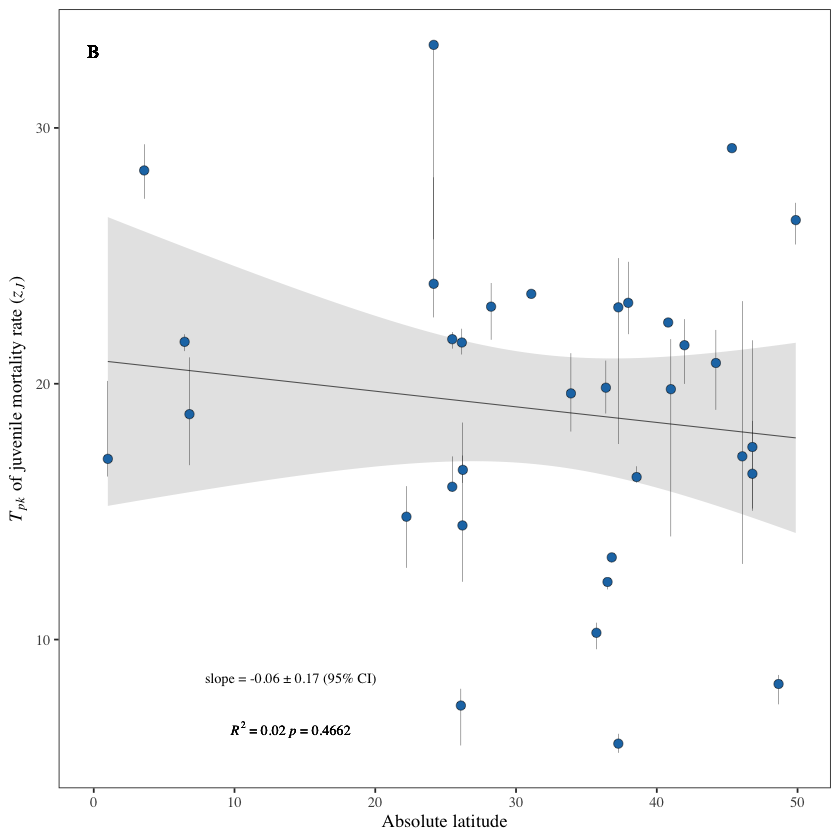

In [26]:
zJ_T_pklat_plot <-
  zJLat_data %>%
  ggplot(aes(x= abs(latitude), y = T_pk)) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(paste(italic(T[pk]), " of juvenile mortality rate (", italic(z[J]),")")))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_linerange(aes(ymin =T_pkLwr , ymax = T_pkUpr),size= 0.1,col="#000000")+
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape = 21, fill="#1f78b4")+
  theme_bw()+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 0, y = 33,label = "B"), 
            parse = TRUE, size = 4, colour = "black",family='Times')+
annotate("text", x = 14, y = 6.5, label = italic("R")^2~"= 0.02"~italic("p")~"= 0.4662", size=3, family='Times')+
annotate("text", x = 14, y = 8.5, label = "slope = -0.06 ± 0.17 (95% CI)", size=3, family='Times')

zJ_T_pklat_plot

## Relationship of $T_{pk}$ of $z$ vs latitude

In [27]:
##### Relationship of $T_{pk}$ of $z$ vs latitude #####

zLat <- as_tibble(read_csv('../data/TraitData.csv')) %>%
                rename(species = interactor1) %>%
                filter(standardisedtraitname == 'z' & latitude != 'NA') %>%
                distinct(species, latitude)

zMass <- as_tibble(read_csv('../data/z_pksT_pksMass.csv'))  %>% 
                select(-curve_ID)
                

head(zLat)

head(zMass)

zLat_data <- zMass %>% inner_join(zLat) %>%
                    mutate(zmassCor = zpk/mass^-0.17)

head(zLat_data)

Rows: 1538 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 34 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zpk, zpkLwr, zpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,latitude
<chr>,<dbl>
Paracoccus marginatus,25.468722
Bemisia tabaci,-6.800000
Antestiopsis thunbergii,-3.334883
Monochamus leuconotus,-3.334883
Anopheles gambiae,6.455027
Phenacoccus solenopsis,22.816700


zpk,zpkLwr,zpkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.005638505,0.007768601,0.004680908,Culex pipiens,16.817,16.71100,16.85097,2.9200000
0.021560283,0.026348713,0.019552732,Paracoccus marginatus,15.835,15.55992,18.11834,3.3650000
0.032803103,0.033983297,0.032462923,Aphis gossypii,11.278,11.03872,11.48561,0.6633333
0.001882355,0.002150609,0.001650687,Tribolium castaneum,26.472,25.64327,27.02264,2.1437500
0.027919601,0.030037375,0.026057252,Tetranychus mcdanieli,15.794,14.16383,16.68443,0.0243000
0.039444080,0.042020167,0.036418754,Bemisia tabaci,21.213,19.70719,22.24240,0.2931250


Joining with `by = join_by(species)`


zpk,zpkLwr,zpkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass,latitude,zmassCor
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.005638505,0.007768601,0.004680908,Culex pipiens,16.817,16.71100,16.85097,2.9200000,39.00000,0.006765176
0.021560283,0.026348713,0.019552732,Paracoccus marginatus,15.835,15.55992,18.11834,3.3650000,25.46872,0.026499759
0.032803103,0.033983297,0.032462923,Aphis gossypii,11.278,11.03872,11.48561,0.6633333,33.90000,0.030592104
0.001882355,0.002150609,0.001650687,Tribolium castaneum,26.472,25.64327,27.02264,2.1437500,37.96897,0.002142897
0.027919601,0.030037375,0.026057252,Tetranychus mcdanieli,15.794,14.16383,16.68443,0.0243000,46.79110,0.014840970
0.039444080,0.042020167,0.036418754,Bemisia tabaci,21.213,19.70719,22.24240,0.2931250,-6.80000,0.032017014


In [28]:
z_T_pklatmodel <- lm( T_pk ~ latitude, data = zLat_data)
summary(z_T_pklatmodel)
confint(z_T_pklatmodel)
anova(z_T_pklatmodel)


Call:
lm(formula = T_pk ~ latitude, data = zLat_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0295  -1.7947  -0.2664   1.8768  10.1718 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.61719    1.11291  16.728   <2e-16 ***
latitude    -0.04886    0.03695  -1.322    0.195    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.767 on 32 degrees of freedom
Multiple R-squared:  0.05181,	Adjusted R-squared:  0.02218 
F-statistic: 1.748 on 1 and 32 DF,  p-value: 0.1955


,2.5 %,97.5 %
(Intercept),16.350261,20.88411790
latitude,-0.124117,0.02640537


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
latitude,1,39.72943,39.72943,1.748414,0.1954501
Residuals,32,727.14016,22.72313,NA,NA


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


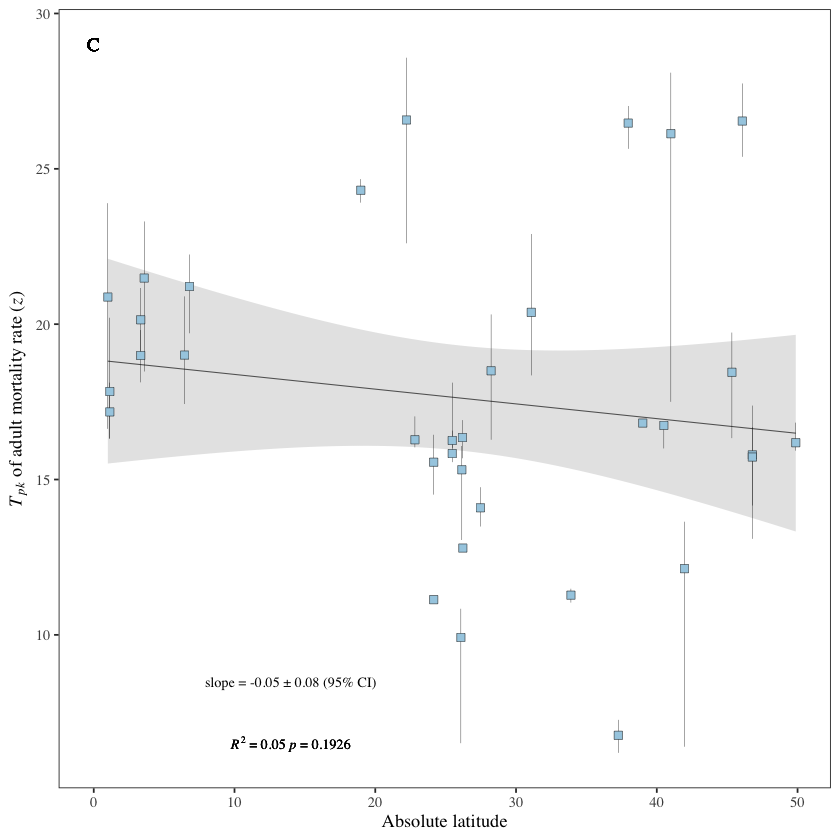

In [29]:
z_T_pklat_plot <-
  zLat_data %>%
  ggplot(aes(x= abs(latitude), y = T_pk))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(paste(italic(T[pk]), " of adult mortality rate (", italic(z),")")))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_linerange(aes(ymin =T_pkLwr , ymax = T_pkUpr),size= 0.1,col="#000000")+
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape=22, fill ="#a6cee3")+
  theme_bw()+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 0, y = 29,label = "C"), 
            parse = TRUE, size = 4, colour = "black", family='Times')+
annotate("text", x = 14, y = 6.5, label = italic("R")^2~"= 0.05"~italic("p")~"= 0.1926", size=3, family='Times')+
annotate("text", x = 14, y = 8.5, label = "slope = -0.05 ± 0.08 (95% CI)", size=3, family='Times')

z_T_pklat_plot


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to n

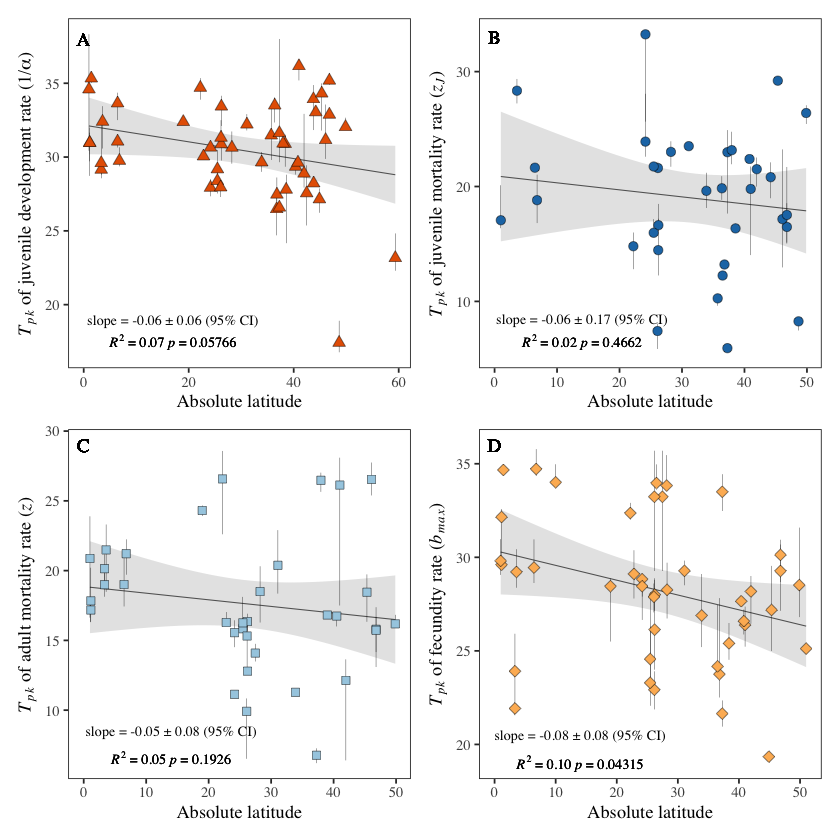

In [30]:
p1 <- a_T_pklat_plot+zJ_T_pklat_plot+z_T_pklat_plot+bmax_T_pklat_plot

p1

save_plot(p1, file= "../results/SI/Traits_Lat_Adapt.pdf",
          base_height=15, base_width = 17, base_asp = 1, units="cm")

## Relationship of $T_{pk}$ of $\alpha$ vs Rearing Temperature

In [31]:
#### Relationship of $T_{pk}$ of $\alpha$ vs Rearing Temperature #### 

RearDF <- as_tibble(read_csv('../data/TraitData.csv')) %>% 
  select(standardisedtraitname,interactor1,interactor1growthtemp) %>%
  filter(interactor1growthtemp != 'not stated' & 
         interactor1growthtemp != 'various' & 
         interactor1growthtemp != 'NA' ) %>%
  rename(trait = standardisedtraitname, species = interactor1, RearTemp = interactor1growthtemp) %>%
  mutate(RearTemp = as.numeric(RearTemp))

Rows: 1538 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [32]:
RearAlpha <- RearDF %>% filter(trait == '1/alpha') %>% 
    group_by(species) %>% 
    summarise(avg = mean(RearTemp)) %>%
    arrange(avg) %>% 
  mutate(curve_ID = case_when(species ==  'Aulacorthum solani' ~ '1',        
  species ==  'Macrosiphum euphorbia' ~ '2',       
  species == 'Myzus persicae' ~ '3',             
  species == 'Drosophila suzukii' ~ '4',         
  species == 'Harmonia axyridis' ~ '5',          
  species == 'Otiorhynchus sulcatus'  ~ '6',     
  species == 'Aphis nasturtii'  ~ '7',      
  species == 'Gastrolina depressa' ~ '8',        
  species == 'Stethorus punctillum'~ '9',       
  species == 'Tetranychus mcdanieli'~ '10',      
  species == 'Thrips hawaiiensis'  ~ '11',       
  species == 'Toxoptera citricida' ~ '12',       
  species == 'Aedes krombeini' ~ '13',          
  species == 'Amblyseius swirskii' ~ '14',    
  species == 'Antestiopsis thunbergii' ~ '15',
  species == 'Helicoverpa armigera' ~ '16',
  species == 'Iphiseius degenerans' ~ '17',      
  species == 'Kampimodromus aberrans' ~ '18',    
  species == 'Leptinotarsa decemlineata' ~ '19',  
  species == 'Macrocentrus iridescens' ~ '20',    
  species == 'Monochamus leuconotus' ~ '21',      
  species == 'Muscidifurax zaraptor' ~ '22',      
  species == 'Paracoccus marginatus' ~ '23',      
  species == 'Phenacoccus solenopsis' ~ '24',    
  species == 'Rhopalosiphum maidis' ~ '25',       
  species == 'Tetraneura nigriabdominalis'~ '26',
  species == 'Aedes albopictus' ~ '27',        
  species == 'Anopheles gambiae' ~ '28',          
  species == 'Aubeonymus mariaefranciscae' ~ '29',
  species == 'Planococcus citri' ~ '30',          
  species == 'Amblyseius womersleyi' ~ '31',      
  species == 'Ophraella communa'~ '32',          
  species == 'Tetranychus urticae' ~ '33',        
  species == 'Anthonomus grandis'~ '34',         
  species == 'Hyperaspis notata' ~ '35',          
  species == 'Tribolium castaneum'~ '36',
  species == 'Scapsipedus icipe'~ '37')) %>%
    arrange(curve_ID) %>% 
    rename(RTemp = avg)
  
head(RearAlpha)


species,RTemp,curve_ID
<chr>,<dbl>,<chr>
Aulacorthum solani,20,1
Tetranychus mcdanieli,24,10
Thrips hawaiiensis,24,11
Toxoptera citricida,24,12
Aedes krombeini,25,13
Amblyseius swirskii,25,14


In [33]:
alpha <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv', header = TRUE)) %>%
  filter(param == 'topt') %>% 
  select(species, estimate, conf_lower, conf_upper, trait) %>%
  mutate(curve_ID = case_when(species ==  'Aulacorthum solani' ~ '1',        
                               species ==  'Macrosiphum euphorbia' ~ '2',       
                               species == 'Myzus persicae' ~ '3',             
                               species == 'Drosophila suzukii' ~ '4',         
                               species == 'Harmonia axyridis' ~ '5',          
                               species == 'Otiorhynchus sulcatus'  ~ '6',     
                               species == 'Aphis nasturtii'  ~ '7',      
                               species == 'Gastrolina depressa' ~ '8',        
                               species ==  'Stethorus punctillum'~ '9',       
                               species == 'Tetranychus mcdanieli'~ '10',      
                               species == 'Thrips hawaiiensis'  ~ '11',       
                               species == 'Toxoptera citricida' ~ '12',       
                               species == 'Aedes krombeini' ~ '13',          
                               species == 'Amblyseius swirskii' ~ '14',    
                               species == 'Antestiopsis thunbergii' ~ '15',
                               species == 'Helicoverpa armigera' ~ '16',
                               species == 'Iphiseius degenerans' ~ '17',      
                               species == 'Kampimodromus aberrans' ~ '18',    
                               species == 'Leptinotarsa decemlineata' ~ '19',  
                               species == 'Macrocentrus iridescens' ~ '20',    
                               species == 'Monochamus leuconotus' ~ '21',      
                               species == 'Muscidifurax zaraptor' ~ '22',      
                               species == 'Paracoccus marginatus' ~ '23',      
                               species == 'Phenacoccus solenopsis' ~ '24',    
                               species == 'Rhopalosiphum maidis' ~ '25',       
                               species == 'Tetraneura nigriabdominalis'~ '26',
                               species == 'Aedes albopictus' ~ '27',        
                               species == 'Anopheles gambiae' ~ '28',          
                               species == 'Aubeonymus mariaefranciscae' ~ '29',
                               species == 'Planococcus citri' ~ '30',          
                               species == 'Amblyseius womersleyi' ~ '31',      
                               species == 'Ophraella communa'~ '32',          
                               species == 'Tetranychus urticae' ~ '33',        
                               species == 'Anthonomus grandis'~ '34',         
                               species == 'Hyperaspis notata' ~ '35',          
                               species == 'Tribolium castaneum'~ '36',
                               species == 'Scapsipedus icipe'~ '37')) %>%
                arrange(curve_ID) %>% filter(curve_ID != 'NA')


In [34]:
RearAlpha <- inner_join(alpha,RearAlpha)

head(RearAlpha)

Joining with `by = join_by(species, curve_ID)`


species,estimate,conf_lower,conf_upper,trait,curve_ID,RTemp
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Aulacorthum solani,26.581,26.29140,26.94898,juvenile development rate,1,20
Tetranychus mcdanieli,35.182,34.89144,35.70428,juvenile development rate,10,24
Thrips hawaiiensis,31.315,30.64751,32.50135,juvenile development rate,11,24
Toxoptera citricida,27.948,27.29404,28.48987,juvenile development rate,12,24
Aedes krombeini,32.381,32.24100,32.53878,juvenile development rate,13,25
Amblyseius swirskii,33.925,31.82901,34.87904,juvenile development rate,14,25


In [35]:
RAlp_model <- lm(estimate ~ RTemp, RearAlpha); summary(RAlp_model); confint(RAlp_model, level=.95)


Call:
lm(formula = estimate ~ RTemp, data = RearAlpha)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4542 -1.7430  0.0037  1.5034  6.0400 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  11.2897     5.4919   2.056  0.04733 * 
RTemp         0.7534     0.2201   3.423  0.00159 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.725 on 35 degrees of freedom
Multiple R-squared:  0.2508,	Adjusted R-squared:  0.2294 
F-statistic: 11.72 on 1 and 35 DF,  p-value: 0.001592


,2.5 %,97.5 %
(Intercept),0.1404973,22.438833
RTemp,0.3066115,1.200134


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


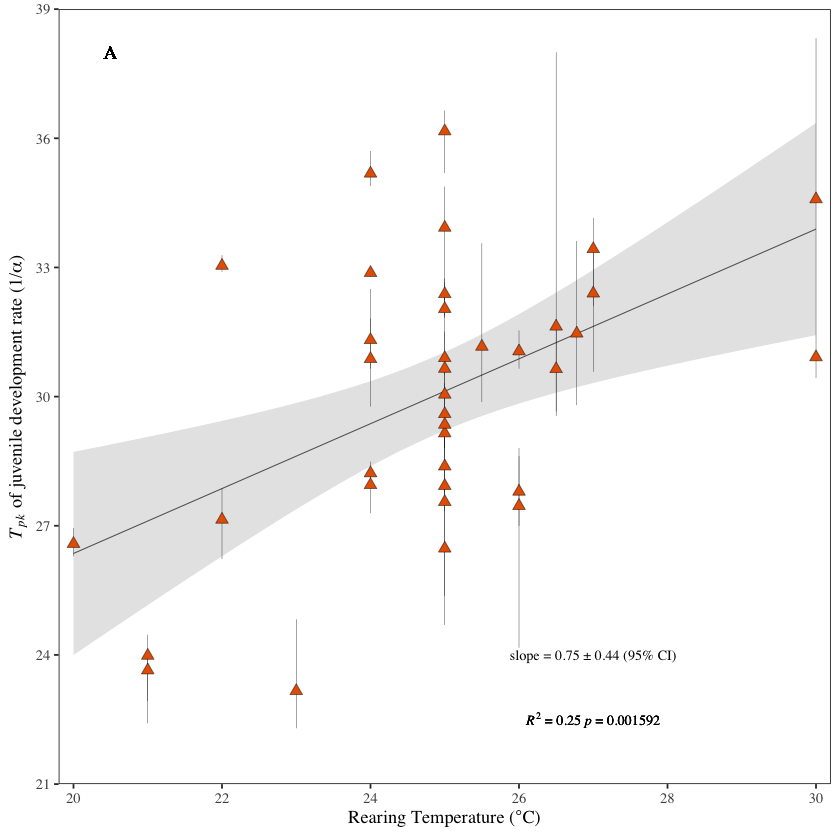

In [36]:
Rear_alp <- ggplot(RearAlpha, aes(x=RTemp, y=estimate)) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  geom_linerange(aes(ymin =conf_lower , ymax = conf_upper),size= 0.1,col="#000000") +
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape=24, fill ='#e66101')+
  theme_bw()+
  scale_x_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)"))),
                     limits =c(19.8,30.2),
                     expand = c(0, 0),
                     breaks=seq(20,30, by=2))+
  scale_y_continuous(expression(paste(italic(T[pk]), " of juvenile development rate (","1/", italic(alpha),")")),
                     limits =c(21,39),
                     expand = c(0, 0),
                     breaks=seq(21,39, by=3))+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 20.5, y = 38,label = "A"), 
            parse = TRUE, size = 4, colour = "black", family='Times')+
annotate("text", x = 27, y = 22.5, label = italic("R")^2~"= 0.25"~italic("p")~"= 0.001592", size=3, family='Times')+
annotate("text", x = 27, y = 24, label = "slope = 0.75 ± 0.44 (95% CI)", size=3, family='Times')

Rear_alp


## Relationship of $T_{pk}$ of $b_{max}$ vs Rearing Temperature

In [37]:
Rearbmax <- RearDF %>% filter(trait == 'bmax') %>% 
  group_by(species) %>% 
  summarise(avg = mean(RearTemp)) %>%
  arrange(avg) %>%
  mutate(curve_ID = case_when(species == 'Aulacorthum solani' ~ '1',
                               species == 'Plutella xylostella' ~ '3',
                               species == 'Aphis nasturtii' ~ '4',
                               species == 'Stethorus punctillum' ~ '5',
                               species == 'Thrips hawaiiensis' ~ '6',
                               species == 'Toxoptera citricida' ~ '7',
                               species == 'Acyrthosiphon pisum' ~ '8',
                               species == 'Aedes krombeini' ~ '9',
                               species == 'Antestiopsis thunbergii' ~ '10',
                               species == 'Helicoverpa armigera' ~ '11',
                               species == 'Hylobius transversovittatus' ~ '12',
                               species == 'Iphiseius degenerans' ~ '13',
                               species == 'Kampimodromus aberrans' ~ '14',
                               species == 'Monochamus leuconotus' ~ '15',
                               species == 'Muscidifurax zaraptor' ~ '16',
                               species == 'Paracoccus marginatus' ~ '17',
                               species == 'Phenacoccus solenopsis' ~ '18',
                               species == 'Rhopalosiphum maidis' ~ '19',
                               species == 'Tetraneura nigriabdominalis' ~ '20',
                               species == 'Tetranychus mcdanieli' ~ '21',
                               species == 'Planococcus citri' ~ '22',    
                               species == 'Amblyseius womersleyi' ~ '23',      
                               species == 'Ophraella communa'  ~ '24',    
                               species == 'Anthonomus grandis' ~ '25',  
                               species == 'Callosobruchus analis'  ~ '26', 
                               species == 'Callosobruchus chinensis' ~ '27',
                               species == 'Callosobruchus maculatus' ~ '28',
                               species == 'Callosobruchus rhodesianus' ~ '29',
                               species == 'Hyperaspis notata' ~ '30',
                               species == 'Scapsipedus icipe' ~ '31')) %>%
  arrange(curve_ID) %>% rename(species = species, RTemp = avg) %>%
  filter(curve_ID != 'NA')


In [38]:
bmax  <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv', header = TRUE)) %>%
  filter(param == 'topt') %>% 
  select(species, estimate, conf_lower, conf_upper, trait) %>%
  mutate(curve_ID = case_when(species == 'Aulacorthum solani' ~ '1',
                              species == 'Plutella xylostella' ~ '3',
                              species == 'Aphis nasturtii' ~ '4',
                              species == 'Stethorus punctillum' ~ '5',
                              species == 'Thrips hawaiiensis' ~ '6',
                              species == 'Toxoptera citricida' ~ '7',
                              species == 'Acyrthosiphon pisum' ~ '8',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Antestiopsis thunbergii' ~ '10',
                              species == 'Helicoverpa armigera' ~ '11',
                              species == 'Hylobius transversovittatus' ~ '12',
                              species == 'Iphiseius degenerans' ~ '13',
                              species == 'Kampimodromus aberrans' ~ '14',
                              species == 'Monochamus leuconotus' ~ '15',
                              species == 'Muscidifurax zaraptor' ~ '16',
                              species == 'Paracoccus marginatus' ~ '17',
                              species == 'Phenacoccus solenopsis' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Tetraneura nigriabdominalis' ~ '20',
                              species == 'Tetranychus mcdanieli' ~ '21',
                              species == 'Planococcus citri' ~ '22',    
                              species == 'Amblyseius womersleyi' ~ '23',      
                              species == 'Ophraella communa'  ~ '24',    
                              species == 'Anthonomus grandis' ~ '25',  
                              species == 'Callosobruchus analis'  ~ '26', 
                              species == 'Callosobruchus chinensis' ~ '27',
                              species == 'Callosobruchus maculatus' ~ '28',
                              species == 'Callosobruchus rhodesianus' ~ '29',
                              species == 'Hyperaspis notata' ~ '30',
                              species == 'Scapsipedus icipe' ~ '31')) %>%
  arrange(curve_ID) %>% 
  filter(curve_ID != 'NA')

Rearbmax <- inner_join(bmax, Rearbmax)


Joining with `by = join_by(species, curve_ID)`


In [39]:
Rbmax_model <- lm(estimate ~ RTemp, Rearbmax); summary(Rbmax_model); confint(Rbmax_model, level=0.95)


Call:
lm(formula = estimate ~ RTemp, data = Rearbmax)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7722 -2.5045 -0.2484  1.5360  7.3861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.03012    9.13655   0.003  0.99739   
RTemp        1.10660    0.35987   3.075  0.00466 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.256 on 28 degrees of freedom
Multiple R-squared:  0.2525,	Adjusted R-squared:  0.2258 
F-statistic: 9.456 on 1 and 28 DF,  p-value: 0.004662


,2.5 %,97.5 %
(Intercept),-18.6852562,18.745492
RTemp,0.3694502,1.843757


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


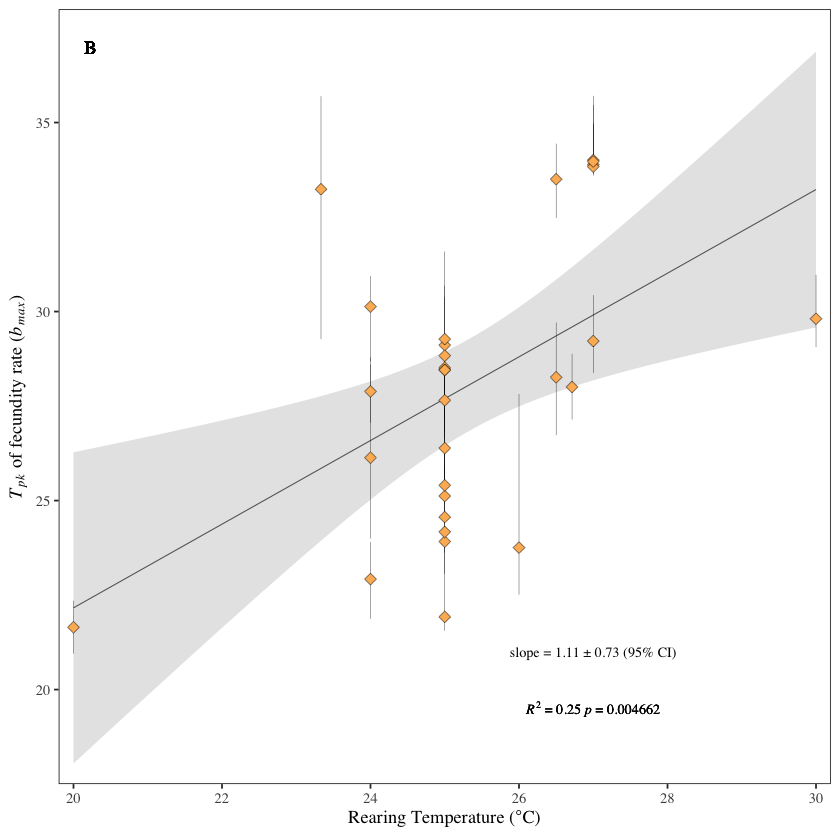

In [40]:
Rear_bmax <- ggplot(Rearbmax, aes(x=RTemp, y=estimate)) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray") +
  geom_linerange(aes(ymin =conf_lower , ymax = conf_upper),size= 0.1,col="#000000") +
  geom_point(size = 2.5,stroke=0.2, col = '#000000', fill="#fdb863", shape=23)+
  theme_bw()+
  scale_x_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)"))),
                     limits =c(19.8,30.2),
                     expand = c(0, 0),
                     breaks=seq(20,30, by=2))+
  scale_y_continuous(expression(paste(italic(T[pk]), " of fecundity rate (", italic(b[max]),")")),
                     limits =c(17.5,38),
                     expand = c(0, 0),
                     breaks=seq(20,35, by=5))+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 20.23, y = 37, label = "B"), 
            parse = TRUE, size = 4, colour = "black", family='Times')+
annotate("text", x = 27, y = 19.5, label = italic("R")^2~"= 0.25"~italic("p")~"= 0.004662", size=3, family='Times')+
annotate("text", x = 27, y = 21, label = "slope = 1.11 ± 0.73 (95% CI)", size=3, family='Times')


Rear_bmax

## Relationship of $T_{pk}$ of $z_J$ vs Rearing Temperature

In [41]:
RearZetaJ <- RearDF %>% filter(trait == 'zj') %>% 
  group_by(species) %>% 
  summarise(avg = mean(RearTemp)) %>%
  arrange(avg) %>% 
  mutate(curve_ID = case_when(species == 'Aulacorthum solani' ~ '1',
                               species == 'Harmonia axyridis' ~ '2',
                               species == 'Aphis nasturtii' ~ '3',
                               species == 'Stethorus punctillum' ~ '4',
                               species == 'Tetranychus mcdanieli' ~ '5',
                               species == 'Thrips hawaiiensis' ~ '6',
                               species == 'Toxoptera citricida' ~ '7',
                               species == 'Acyrthosiphon pisum' ~ '8',
                               species == 'Aedes albopictus' ~ '9',
                               species == 'Helicoverpa armigera' ~ '10',
                               species == 'Muscidifurax zaraptor' ~ '11',
                               species == 'Paracoccus marginatus' ~ '12',
                               species == 'Rhopalosiphum maidis' ~ '13',
                               species == 'Tetraneura nigriabdominalis' ~ '14',
                               species == 'Planococcus citri' ~ '15',
                               species == 'Anopheles gambiae' ~ '16',
                               species == 'Aubeonymus mariaefranciscae' ~ '17',
                               species == 'Amblyseius womersleyi' ~ '18',
                               species == 'Ophraella communa' ~ '19',
                               species == 'Anthonomus grandis' ~ '20',
                               species == 'Hyperaspis notata' ~ '21',
                               species == 'Tetranychus urticae' ~ '22',
                               species == 'Scapsipedus icipe' ~ '23',
                               species == 'Tribolium castaneum' ~ '24')) %>%
  arrange(curve_ID) %>% rename(species = species, RTemp = avg) %>%
  filter(curve_ID != 'NA')


In [42]:
zetaJ <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv', header = TRUE)) %>%
  filter(param == 'topt') %>% 
  select(species, estimate, conf_lower, conf_upper, trait) %>%
  mutate(curve_ID = case_when(species == 'Aulacorthum solani' ~ '1',
                              species == 'Harmonia axyridis' ~ '2',
                              species == 'Aphis nasturtii' ~ '3',
                              species == 'Stethorus punctillum' ~ '4',
                              species == 'Tetranychus mcdanieli' ~ '5',
                              species == 'Thrips hawaiiensis' ~ '6',
                              species == 'Toxoptera citricida' ~ '7',
                              species == 'Acyrthosiphon pisum' ~ '8',
                              species == 'Aedes albopictus' ~ '9',
                              species == 'Helicoverpa armigera' ~ '10',
                              species == 'Muscidifurax zaraptor' ~ '11',
                              species == 'Paracoccus marginatus' ~ '12',
                              species == 'Rhopalosiphum maidis' ~ '13',
                              species == 'Tetraneura nigriabdominalis' ~ '14',
                              species == 'Planococcus citri' ~ '15',
                              species == 'Anopheles gambiae' ~ '16',
                              species == 'Aubeonymus mariaefranciscae' ~ '17',
                              species == 'Amblyseius womersleyi' ~ '18',
                              species == 'Ophraella communa' ~ '19',
                              species == 'Anthonomus grandis' ~ '20',
                              species == 'Hyperaspis notata' ~ '21',
                              species == 'Tetranychus urticae' ~ '22',
                              species == 'Scapsipedus icipe' ~ '23',
                              species == 'Tribolium castaneum' ~ '24')) %>%
                              arrange(curve_ID) %>% filter(curve_ID != 'NA')


In [43]:
RearZetaJ <- inner_join(zetaJ,RearZetaJ)
 
 head(RearZetaJ)

Joining with `by = join_by(species, curve_ID)`


species,estimate,conf_lower,conf_upper,trait,curve_ID,RTemp
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Aulacorthum solani,5.932,5.571619,6.316937,juvenile mortality rate,1,20
Helicoverpa armigera,19.788,14.030444,21.744234,juvenile mortality rate,10,25
Muscidifurax zaraptor,26.397,25.443401,27.072000,juvenile mortality rate,11,25
Paracoccus marginatus,15.973,15.779216,17.159733,juvenile mortality rate,12,25
Rhopalosiphum maidis,23.906,22.593000,28.070000,juvenile mortality rate,13,25
Tetraneura nigriabdominalis,33.246,25.646603,33.258922,juvenile mortality rate,14,25


In [44]:
RzetaJ_model <- lm(estimate ~ RTemp, RearZetaJ); summary(RzetaJ_model); confint(RzetaJ_model, level=0.95)


Call:
lm(formula = estimate ~ RTemp, data = RearZetaJ)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8944 -3.9673 -0.3787  3.6397 15.0194 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -4.5516    15.3187  -0.297    0.769
RTemp         0.9111     0.6016   1.515    0.144

Residual standard error: 6.252 on 22 degrees of freedom
Multiple R-squared:  0.09442,	Adjusted R-squared:  0.05325 
F-statistic: 2.294 on 1 and 22 DF,  p-value: 0.1441


,2.5 %,97.5 %
(Intercept),-36.3206852,27.217560
RTemp,-0.3365079,2.158757


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


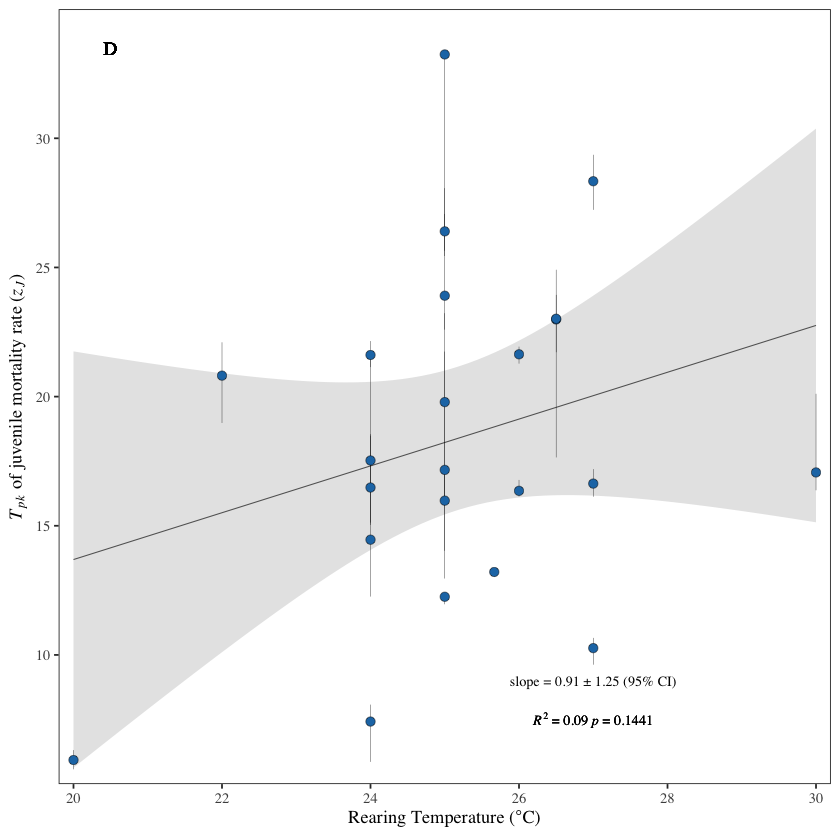

In [45]:
Rear_zj <- ggplot(RearZetaJ, aes(x=RTemp, y=estimate)) +
   geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
   geom_linerange(aes(ymin =conf_lower , ymax = conf_upper),size= 0.1,col="#000000") +
   geom_point(size = 2.5,stroke=0.2, col = '#000000', shape = 21, fill="#1f78b4")+
   theme_bw()+
   scale_x_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)"))),
                      limits =c(19.8,30.2),
                      expand = c(0, 0),
                      breaks=seq(20,30, by=2))+
   scale_y_continuous(expression(paste(italic(T[pk]), " of juvenile mortality rate (", italic(z[J]),")")),
                      limits =c(5,35),
                      expand = c(0, 0),
                      breaks=seq(10,30, by=5))+
   theme(legend.position = 'none',legend.text = element_text(size = 10))+
   theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
         panel.grid.minor = element_blank())+
   geom_text(aes(x = 20.5, y = 33.5,label = "D"), 
             parse = TRUE, size = 4, colour = "black", family= 'Times')+
annotate("text", x = 27, y = 7.5, label = italic("R")^2~"= 0.09"~italic("p")~"= 0.1441", size=3, family='Times')+
annotate("text", x = 27, y = 9, label = "slope = 0.91 ± 1.25 (95% CI)", size=3, family='Times')

Rear_zj

## Relationship of $T_{pk}$ of $z$ vs Rearing Temperature

In [46]:
RearZeta <- RearDF %>% filter(trait == 'z') %>% 
   group_by(species) %>% 
   summarise(avg = mean(RearTemp)) %>%
   arrange(avg) %>%
   mutate(curve_ID = case_when(species == 'Aulacorthum solani' ~ '1',
                               species == 'Plutella xylostella' ~ '2',
                               species == 'Aphis nasturtii' ~ '3',
                               species == 'Stethorus punctillum' ~ '4',
                               species == 'Thrips hawaiiensis' ~ '5',
                               species == 'Toxoptera citricida' ~ '6',
                               species == 'Aedes krombeini' ~ '7',
                               species == 'Antestiopsis thunbergii' ~ '8',
                               species == 'Helicoverpa armigera' ~ '9',
                               species == 'Monochamus leuconotus' ~ '10',
                               species == 'Muscidifurax zaraptor' ~ '11',
                               species == 'Paracoccus marginatus' ~ '12',
                               species == 'Phenacoccus solenopsis' ~ '13',
                               species == 'Rhopalosiphum maidis' ~ '14',
                               species == 'Tetraneura nigriabdominalis' ~ '15',
                               species == 'Tetranychus mcdanieli' ~ '16',
                               species == 'Aedes albopictus' ~ '17',
                               species == 'Anopheles gambiae' ~ '18',
                               species == 'Ophraella communa' ~ '19',
                               species == 'Anthonomus grandis' ~ '20',
                               species == 'Culex pipiens' ~ '21',
                               species == 'Culex quinquefasciatus' ~ '22',
                               species == 'Hyperaspis notata' ~ '23',
                               species == 'Scapsipedus icipe' ~ '24',
                               species == 'Tribolium castaneum' ~ '25')) %>%
   arrange(curve_ID) %>% rename(RTemp = avg) %>%
   filter(curve_ID != 'NA')
 

In [47]:
 zeta  <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv', header = TRUE)) %>%
   filter(param == 'topt') %>% 
   select(species, estimate, conf_lower, conf_upper, trait) %>%
   mutate(curve_ID = case_when(species == 'Aulacorthum solani' ~ '1',
                               species == 'Plutella xylostella' ~ '2',
                               species == 'Aphis nasturtii' ~ '3',
                               species == 'Stethorus punctillum' ~ '4',
                               species == 'Thrips hawaiiensis' ~ '5',
                               species == 'Toxoptera citricida' ~ '6',
                               species == 'Aedes krombeini' ~ '7',
                               species == 'Antestiopsis thunbergii' ~ '8',
                               species == 'Helicoverpa armigera' ~ '9',
                               species == 'Monochamus leuconotus' ~ '10',
                               species == 'Muscidifurax zaraptor' ~ '11',
                               species == 'Paracoccus marginatus' ~ '12',
                               species == 'Phenacoccus solenopsis' ~ '13',
                               species == 'Rhopalosiphum maidis' ~ '14',
                               species == 'Tetraneura nigriabdominalis' ~ '15',
                               species == 'Tetranychus mcdanieli' ~ '16',
                               species == 'Aedes albopictus' ~ '17',
                               species == 'Anopheles gambiae' ~ '18',
                               species == 'Ophraella communa' ~ '19',
                               species == 'Anthonomus grandis' ~ '20',
                               species == 'Culex pipiens' ~ '21',
                               species == 'Culex quinquefasciatus' ~ '22',
                               species == 'Hyperaspis notata' ~ '23',
                               species == 'Scapsipedus icipe' ~ '24',
                               species == 'Tribolium castaneum' ~ '25')) %>%
   arrange(curve_ID) %>% 
   filter(curve_ID != 'NA')


In [48]:
RearZeta <- inner_join(zeta,RearZeta) 

head(RearZeta)

Joining with `by = join_by(species, curve_ID)`


species,estimate,conf_lower,conf_upper,trait,curve_ID,RTemp
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Aulacorthum solani,6.767,6.20263,7.265223,adult mortality rate,1,20
Monochamus leuconotus,18.992,18.12775,19.810810,adult mortality rate,10,25
Muscidifurax zaraptor,16.185,15.92897,16.831285,adult mortality rate,11,25
Paracoccus marginatus,15.835,15.55992,18.118337,adult mortality rate,12,25
Phenacoccus solenopsis,16.280,16.03432,17.032258,adult mortality rate,13,25
Rhopalosiphum maidis,15.557,14.51385,16.440658,adult mortality rate,14,25


In [49]:
Rzeta_model <- lm(estimate ~ RTemp, RearZeta); summary(Rzeta_model); confint(Rzeta_model, level=0.95)


Call:
lm(formula = estimate ~ RTemp, data = RearZeta)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9074 -2.8844 -0.5096  1.7826  9.1969 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -17.6563    10.4695  -1.686  0.10523   
RTemp         1.3836     0.4106   3.370  0.00265 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.154 on 23 degrees of freedom
Multiple R-squared:  0.3305,	Adjusted R-squared:  0.3014 
F-statistic: 11.35 on 1 and 23 DF,  p-value: 0.002647


,2.5 %,97.5 %
(Intercept),-39.3141469,4.001467
RTemp,0.5341733,2.233065


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


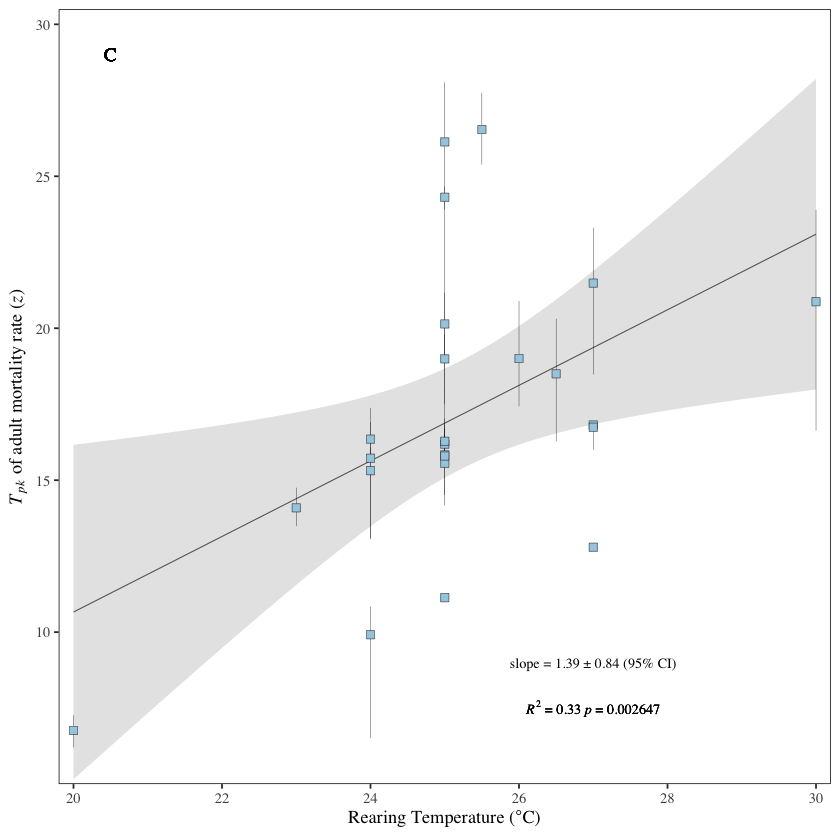

In [50]:
Rear_z <- ggplot(RearZeta, aes(x=RTemp, y=estimate)) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray") +
  geom_linerange(aes(ymin =conf_lower , ymax = conf_upper),size= 0.1,col="#000000") +
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape=22, fill ="#a6cee3")+
  theme_bw()+
  scale_x_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)"))),
                     limits =c(19.8,30.2),
                     expand = c(0, 0),
                     breaks=seq(20,32, by=2))+
  scale_y_continuous(expression(paste(italic(T[pk]), " of adult mortality rate (", italic(z),")")),
                     limits =c(5,30.5),
                     expand = c(0, 0),
                     breaks=seq(10,30, by=5))+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 20.5, y = 29,label = "C"), 
            parse = TRUE, size = 4, colour = "black", family='Times')+
annotate("text", x = 27, y = 7.5, label = italic("R")^2~"= 0.33"~italic("p")~"= 0.002647", size=3, family='Times')+
annotate("text", x = 27, y = 9, label = "slope = 1.39 ± 0.84 (95% CI)", size=3, family='Times')

Rear_z  


In [51]:
p2 <- Rear_alp+Rear_bmax+Rear_z+Rear_zj

save_plot(p2, file="../results/SI/Traits_RearTemp_Adapt.pdf", 
          base_height=15,base_width = 17, base_asp = 0.75,units="cm")

`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


# Relationship between Latitude and Rearing Temperature 

In [52]:
RearTemp_vs_Lat_Data <- as_tibble(read_csv('../data/TraitData.csv')) %>% 
  select(standardisedtraitname, interactor1, interactor1temp, interactor1growthtemp, latitude) %>%
  filter(interactor1growthtemp != 'not stated' & interactor1growthtemp != 'various' & 
           interactor1growthtemp != 'NA' & latitude != 'NA') %>%
  rename(trait = standardisedtraitname, species = interactor1, RearTemp = interactor1growthtemp) %>%
  mutate(RearTemp = as.numeric(RearTemp), RearTemp = as.numeric(RearTemp))

head(RearTemp_vs_Lat_Data)

Rows: 1538 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


trait,species,interactor1temp,RearTemp,latitude
<chr>,<chr>,<chr>,<dbl>,<dbl>
bmax,Acyrthosiphon pisum,10,25,36.5
bmax,Acyrthosiphon pisum,15,25,36.5
bmax,Acyrthosiphon pisum,20,25,36.5
bmax,Acyrthosiphon pisum,25,25,36.5
bmax,Acyrthosiphon pisum,30,25,36.5
zj,Acyrthosiphon pisum,10,25,36.5


`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


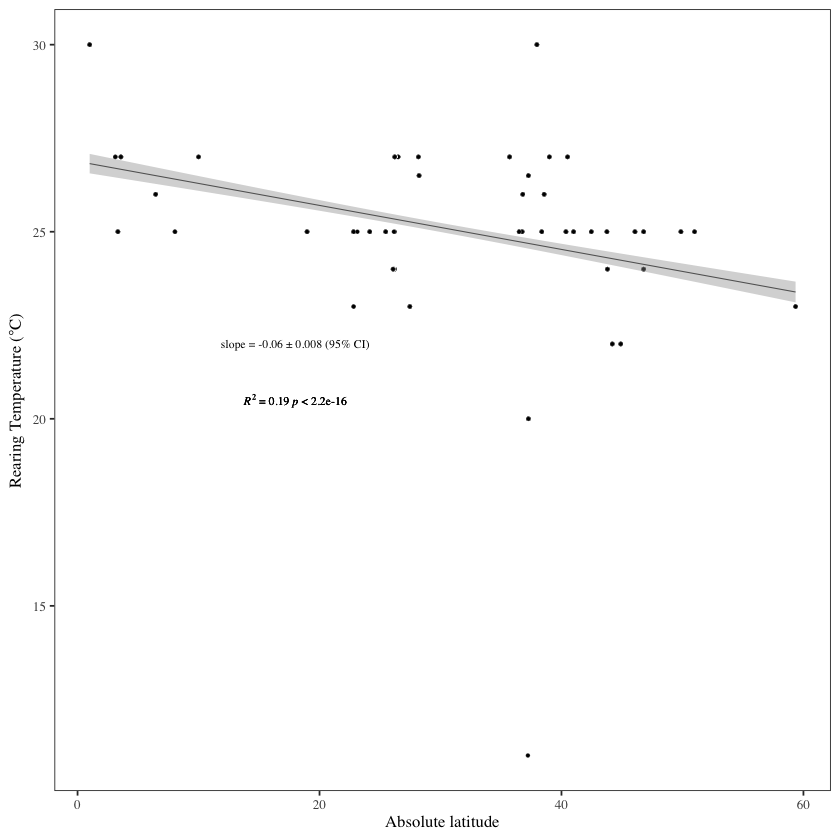

In [53]:
RearTemp_vs_Lat <- ggplot(RearTemp_vs_Lat_Data, aes(x=abs(latitude), y=RearTemp)) +
  geom_point(size = 1.2,stroke=0.1, col = '#FFFFFF', fill="#000000", shape=21)+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3) +
  theme_bw()+
  scale_y_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)")))) +
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  theme(legend.position = 'none', legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times", size = 10), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
annotate("text", x = 18, y = 20.5, label = italic("R")^2~"= 0.19"~italic("p")~"< 2.2e-16", size=2.5, family='Times')+
annotate("text", x = 18, y = 22, label = "slope = -0.06 ± 0.008 (95% CI)", size=2.5, family='Times')

RearTemp_vs_Lat

save_plot(RearTemp_vs_Lat, file="../results/SI/RearTemp_vs_Latitude.pdf", 
          base_height=6, base_width=7, base_asp=1, units="cm")

In [54]:
RearTemp_vs_Lat_model <- lm(RearTemp ~ abs(latitude), RearTemp_vs_Lat_Data); summary(RearTemp_vs_Lat_model)
confint(RearTemp_vs_Lat_model, level=0.95)


Call:
lm(formula = RearTemp ~ abs(latitude), data = RearTemp_vs_Lat_Data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6905  -0.7640  -0.1279   1.0533   5.3533 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.879597   0.136346  197.14   <2e-16 ***
abs(latitude) -0.058807   0.004187  -14.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.833 on 871 degrees of freedom
Multiple R-squared:  0.1847,	Adjusted R-squared:  0.1838 
F-statistic: 197.3 on 1 and 871 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),26.61199249,27.14720108
abs(latitude),-0.06702433,-0.05059064
